# Problem Statement
A multinational pharmaceutical company, ABC, has launched one of its drugs, XYZ, for treatment of multiple indications of stage 1 Chronic Kidney Disease 2.5 years ago. Since then, many physicians have actively adopted and prescribed the drug. However, some physicians are yet to adopt the drug (prescribe it for the first time). Identify who among the non-adopted physicians will adopt the drug in next quarter in order to channelize the marketing efforts more effectively while targeting these potential physicians.

# Data
Refer to the data dictionary file to know more about the data.

# Importing Necessary Libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# Statistics
from scipy.stats import norm

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Understanding

In [2]:
# Loading input data file 1
df1 = pd.read_csv('input_data_file1.csv')
print(df1.shape)
df1.head()

(100000, 26)


,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_value_tier
0,1,201502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,201503,0,10,11,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,1,201504,1,8,8,0,0,0,0,0,...,15,0,0,0,0,1,1,109,19,NaN
3,1,201601,1,11,24,0,0,0,0,0,...,29,0,0,0,0,1,1,204,18,NaN
4,1,201602,1,15,44,0,0,0,0,0,...,35,0,0,0,0,1,1,180,37,NaN


In [3]:
# Loading input data file 2
df2 = pd.read_csv('input_data_file2.csv')
print(df2.shape)
df2.head()

(10000, 7)


,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,0.91,0.89,M,58,83,nephrology
1,2,0.21,0.89,M,41,71,other
2,3,1.00,0.58,M,38,71,nephrology
3,4,0.96,0.96,M,42,69,nephrology
4,5,1.00,0.20,M,38,69,nephrology


In [4]:
# Loading test physicians data
test_physicians = pd.read_csv('Test_physicians.csv')
print(test_physicians.shape)
test_physicians.head()

(1502, 1)


,physician_id
0,7
1,9
2,12
3,19
4,20


In [5]:
# Merging input data file 1 & 2
combined_df = pd.merge(df1, df2, how='left', on='physician_id')
print(combined_df.shape)
combined_df.head()

(100000, 32)


,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_value_tier,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,201502,0,0,0,0,0,0,0,0,...,0,0,0,NaN,0.91,0.89,M,58,83,nephrology
1,1,201503,0,10,11,0,0,1,0,0,...,1,0,0,NaN,0.91,0.89,M,58,83,nephrology
2,1,201504,1,8,8,0,0,0,0,0,...,1,109,19,NaN,0.91,0.89,M,58,83,nephrology
3,1,201601,1,11,24,0,0,0,0,0,...,1,204,18,NaN,0.91,0.89,M,58,83,nephrology
4,1,201602,1,15,44,0,0,0,0,0,...,1,180,37,NaN,0.91,0.89,M,58,83,nephrology


In [6]:
# Duplicates check
combined_df.duplicated().sum()

0

There are no duplicate rows. So, let us move forward.

In [7]:
# Data types check
combined_df.dtypes

physician_id                                             int64
year_quarter                                             int64
brand_prescribed                                         int64
total_representative_visits                              int64
total_sample_dropped                                     int64
saving_cards_dropped                                     int64
vouchers_dropped                                         int64
total_seminar_as_attendee                                int64
total_seminar_as_speaker                                 int64
physician_hospital_affiliation                           int64
physician_in_group_practice                              int64
total_prescriptions_for_indication1                      int64
total_prescriptions_for_indication2                      int64
total_prescriptions_for_indication3                      int64
total_patient_with_commercial_insurance_plan             int64
total_patient_with_medicare_insurance_plan             

The data type of each feature is appropriate. During data cleaning, we'll modify 'year_quarter' and 'physician_value_tier' columns to get them in a better format.

In [8]:
# Numerical variable discription
combined_df.describe().iloc[:, :15]

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5000.500000,201602.500000,0.453850,7.506650,9.702910,0.74199,0.125300,0.136530,0.04013,0.185100,0.958200,77.040460,47.684210,79.774910,77.352210
std,2886.765765,77.078592,0.497868,6.672713,26.254091,3.26853,1.255713,0.405131,0.70429,0.388381,0.200133,84.540337,84.315863,97.928026,94.695333
min,1.000000,201502.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.750000,201504.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,18.000000,3.000000,15.000000,10.000000
50%,5000.500000,201602.500000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,57.000000,19.000000,55.000000,49.000000
75%,7500.250000,201701.000000,1.000000,11.000000,9.000000,0.00000,0.000000,0.000000,0.00000,0.000000,1.000000,109.000000,58.000000,112.000000,110.000000
max,10000.000000,201703.000000,1.000000,55.000000,1392.000000,140.00000,116.000000,8.000000,89.00000,1.000000,1.000000,2438.000000,2932.000000,3967.000000,2109.000000


In [9]:
# Numerical variable discription
combined_df.describe().iloc[:, 15:]

,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_tenure,physician_age
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,98.300430,40.610380,1.733090,1.593150,0.204750,0.310640,0.842560,0.901500,337.530720,51.999210,0.920926,0.643073,28.058500,60.116900
std,147.514147,104.658218,7.594929,11.755728,0.741912,1.961122,0.364217,0.297991,393.584016,87.135455,0.167215,0.322035,13.326359,14.072598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,3.000000,28.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.000000,2.000000,0.930000,0.350000,18.000000,51.000000
50%,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,236.000000,23.000000,1.000000,0.840000,29.000000,61.000000
75%,135.000000,28.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,475.000000,66.000000,1.000000,0.920000,38.000000,70.000000
max,4746.000000,3024.000000,572.000000,819.000000,48.000000,140.000000,1.000000,1.000000,9199.000000,3790.000000,1.000000,1.000000,68.000000,94.000000


In [10]:
# Categorical variable discription
for col in combined_df.select_dtypes(include='object').columns:
    print(f'{combined_df[col].value_counts()}\n{"-"*40}')

2-High         18767
1-Very High    15856
3-Medium        9212
4-Low           5067
Name: physician_value_tier, dtype: int64
----------------------------------------
M          56110
F          43850
Unknown       40
Name: physician_gender, dtype: int64
----------------------------------------
nephrology    77680
other         16240
urology        6080
Name: physician_speciality, dtype: int64
----------------------------------------


All the features have data in a reasonable range.<br>
As 'Unknown' values in 'physician_gender' column are only 40, we will replace it with the most common gender in the data that is 'M'.

In [11]:
# Missing values check
mv=combined_df.isnull().sum()
mv[mv>0]

physician_value_tier    51098
dtype: int64

# Data Cleaning

By looking at the data, we can notice that there is no information available on physician value tiers for the initial quarters which is the leading cause for this high number of null values. Let us assume that the physician's value tier will be the same in the initial quarters as in the later quarters. So, the value tier of any physician in the initial quarters can be considered the most common value tier assigned to them in those last quarters. Before doing this, let us check how many physicians are there with no information on the value tier in any quarter.

In [12]:
# Physicians with no value tier information in any quarter
temp=combined_df.groupby('physician_id').physician_value_tier.count()
len(temp[temp==0])

45

There are 45 physicians out of 10,000 physicians (i.e., 0.45%) for whom there is no value tier information available for any quarter. For the rest of the physicians, a value tier is assigned for at least one quarter, which can be assumed to be similar for the rest of the quarters as there is a high chance of that physician repeating the same prescribing behavior. Now, since 0.45% is minimal data, we will fill value tier information for these physicians by the most common value tier among the rest of the physicians.

In [13]:
# Filling the missing values
value_tiers = combined_df.groupby('physician_id').physician_value_tier.agg(lambda x: x.mode()[0] if x.count()>0 else combined_df.physician_value_tier.mode()[0])
combined_df_cleaned1 = combined_df.fillna({'physician_value_tier': combined_df['physician_id'].apply(lambda x: value_tiers[x])})
combined_df_cleaned1.isnull().sum().sum()

0

Now, there are no missing values in the dataset.<br>
Let us perform modifications to the 'year_quarter', 'physician_value_tier', and 'physician_gender' columns as discussed in the prior steps.

In [14]:
# Modifying features
combined_df_cleaned2 = combined_df_cleaned1.copy()
combined_df_cleaned2.replace({'year_quarter': {201502:1, 201503:2, 201504:3, 201601:4, 201602:5,
                                              201603:6, 201604:7, 201701:8, 201702:9, 201703:10},
                             'physician_value_tier': {'1-Very High':1, '2-High':2, '3-Medium':3, '4-Low':4},
                             'physician_gender': {'Unknown': 'M'}}, inplace=True)
combined_df_cleaned2.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_value_tier,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0.91,0.89,M,58,83,nephrology
1,1,2,0,10,11,0,0,1,0,0,...,1,0,0,2,0.91,0.89,M,58,83,nephrology
2,1,3,1,8,8,0,0,0,0,0,...,1,109,19,2,0.91,0.89,M,58,83,nephrology
3,1,4,1,11,24,0,0,0,0,0,...,1,204,18,2,0.91,0.89,M,58,83,nephrology
4,1,5,1,15,44,0,0,0,0,0,...,1,180,37,2,0.91,0.89,M,58,83,nephrology


We have to predict whether a given physician will adopt and prescribe our drug in the 11th quarter. This prediction can be made based on the data available for the previous quarter. Therefore, our dependent variable value for any quarter will be the 'brand_prescribed' value for the next quarter. Let us create our dependent variable.

In [15]:
# Creating our dependent variable
combined_df_cleaned3 = combined_df_cleaned2.copy()

def drug_adopted_function(row):
    physician_id = row[0]
    year_quarter = row[1]
    df = combined_df_cleaned2
    next_quarter = year_quarter+1
    if next_quarter>10:
        return -1
    else:
        drug_adopted = df[(df.physician_id==physician_id)&(df.year_quarter==next_quarter)]['brand_prescribed']
        return int(drug_adopted)

combined_df_cleaned3['drug_adopted']=combined_df_cleaned3[['physician_id', 'year_quarter']].apply(drug_adopted_function, axis=1)
combined_df_cleaned3.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_competitor_prescription,new_prescriptions,physician_value_tier,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,drug_adopted
0,1,1,0,0,0,0,0,0,0,0,...,0,0,2,0.91,0.89,M,58,83,nephrology,0
1,1,2,0,10,11,0,0,1,0,0,...,0,0,2,0.91,0.89,M,58,83,nephrology,1
2,1,3,1,8,8,0,0,0,0,0,...,109,19,2,0.91,0.89,M,58,83,nephrology,1
3,1,4,1,11,24,0,0,0,0,0,...,204,18,2,0.91,0.89,M,58,83,nephrology,1
4,1,5,1,15,44,0,0,0,0,0,...,180,37,2,0.91,0.89,M,58,83,nephrology,1


In [16]:
# Preparing testing data
temp = pd.merge(test_physicians, combined_df_cleaned3, how='left', on='physician_id')
test_df = temp[temp.year_quarter==10].reset_index(drop=True).drop(columns='drug_adopted')
print(test_df.shape)
test_df.head()

(1502, 32)


,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_value_tier,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,7,10,0,4,8,0,0,0,0,0,...,1,102,0,4,0.62,0.90,M,47,72,nephrology
1,9,10,0,8,0,0,0,0,0,0,...,1,119,0,3,0.90,0.29,M,46,73,other
2,12,10,0,2,9,0,0,0,0,0,...,1,33,5,3,1.00,0.08,M,37,65,other
3,19,10,0,5,0,0,0,0,0,0,...,1,103,21,2,1.00,0.96,M,46,70,nephrology
4,20,10,0,0,0,0,0,0,0,0,...,1,217,36,4,1.00,0.86,M,46,72,nephrology


In [17]:
# Preparing training data
train_df = combined_df_cleaned3.drop(combined_df_cleaned3[combined_df_cleaned3.drug_adopted==-1].index).reset_index(drop=True)
#train_df.to_csv('Modelling_data_file.csv', index=False)
print(train_df.shape)
train_df.head(10)

(90000, 33)


,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_competitor_prescription,new_prescriptions,physician_value_tier,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,drug_adopted
0,1,1,0,0,0,0,0,0,0,0,...,0,0,2,0.91,0.89,M,58,83,nephrology,0
1,1,2,0,10,11,0,0,1,0,0,...,0,0,2,0.91,0.89,M,58,83,nephrology,1
2,1,3,1,8,8,0,0,0,0,0,...,109,19,2,0.91,0.89,M,58,83,nephrology,1
3,1,4,1,11,24,0,0,0,0,0,...,204,18,2,0.91,0.89,M,58,83,nephrology,1
4,1,5,1,15,44,0,0,0,0,0,...,180,37,2,0.91,0.89,M,58,83,nephrology,1
5,1,6,1,9,39,0,0,1,0,0,...,165,42,2,0.91,0.89,M,58,83,nephrology,1
6,1,7,1,4,12,0,0,0,0,0,...,169,45,2,0.91,0.89,M,58,83,nephrology,1
7,1,8,1,14,26,0,0,1,0,0,...,198,49,2,0.91,0.89,M,58,83,nephrology,1
8,1,9,1,18,20,0,0,1,0,0,...,170,46,2,0.91,0.89,M,58,83,nephrology,1
9,2,1,0,0,0,0,0,0,0,1,...,0,0,2,0.21,0.89,M,41,71,other,0


The training data contains physician data for the first nine quarters, and the testing data has 10th quarter data based on which predictions have to be made for the 11th quarter.

# Exploratory Data Analysis (EDA)

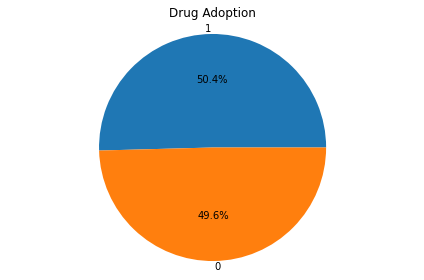

In [18]:
# Class imbalance check
temp = train_df.drug_adopted.value_counts(normalize=True)
plt.pie(temp, labels=temp.index, autopct='%0.1f%%', labeldistance=1.05)
plt.title('Drug Adoption')
plt.axis('equal')
plt.tight_layout()
plt.show()

Half of the physicians have adopted the drug in the training data, and half have not yet adopted the drug, which makes our data balanced for training the model.

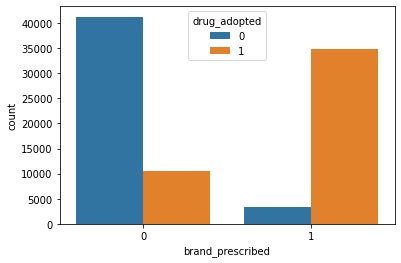

In [19]:
# Relationship between 'brand_prescribed' variable and the dependent variable
sns.countplot(data=train_df, x='brand_prescribed', hue='drug_adopted')
plt.show()

There is a possibility of a physician not prescribing our drug in any quarter even when he/she has adopted our drug in the previous quarter.

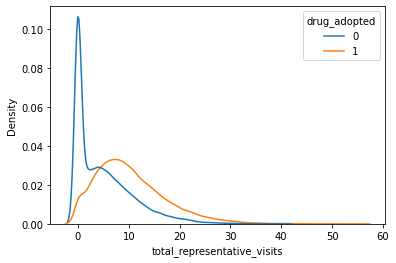

In [20]:
# Relationship between 'total_representative_visits' variable and the dependent variable
sns.kdeplot(data=train_df, x='total_representative_visits', hue='drug_adopted')
plt.show()

As we can observe from the above plot, distributions of the 'total_representative_visits' feature are considerably different for two values of the dependent variable, which signifies that it has a good impact in predicting the dependent variable. It seems that more is the total representative visits, more likely it is for a physician to adopt our drug.

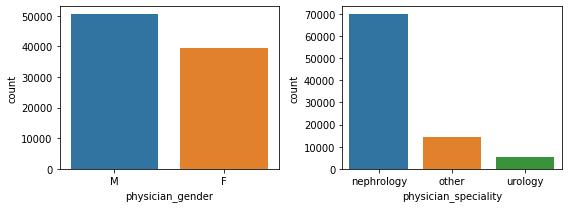

In [21]:
# Categorical features' distribution
plt.figure(figsize=(8, 3))
i=0
for col in train_df.select_dtypes(include='object').columns:
    i += 1
    plt.subplot(1, 2, i)
    sns.countplot(train_df[col])
plt.tight_layout()
plt.show()

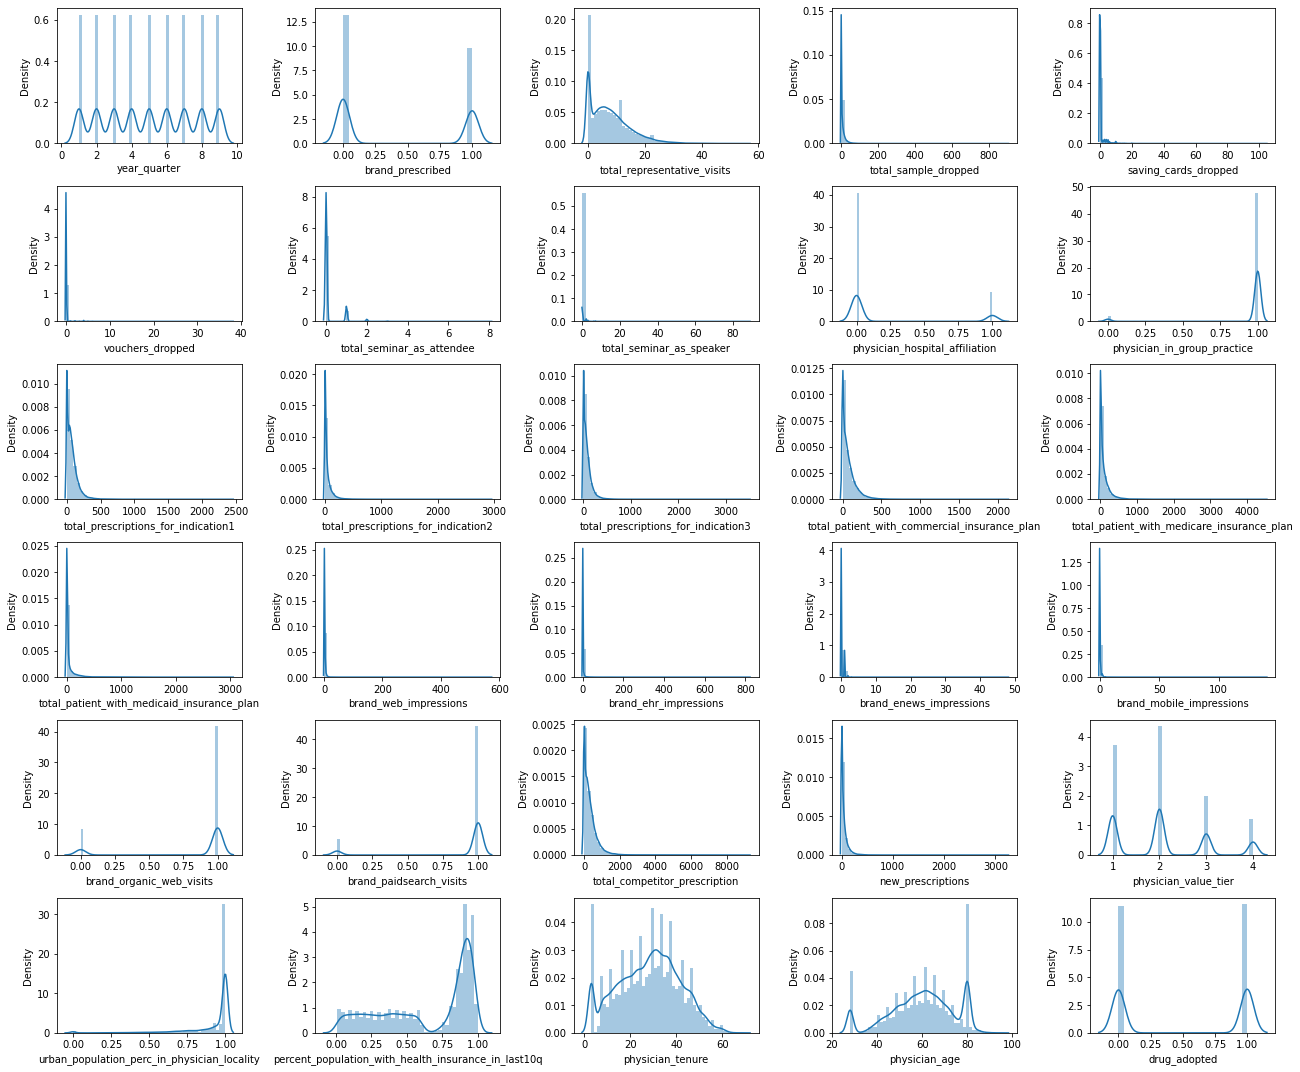

In [22]:
# Numerical features' distribution
plt.figure(figsize=(18, 15))
i=0
for col in train_df.select_dtypes(include=np.number).columns[1:]:
    i += 1
    plt.subplot(6, 5, i)
    sns.distplot(train_df[col])
plt.tight_layout()
plt.show()

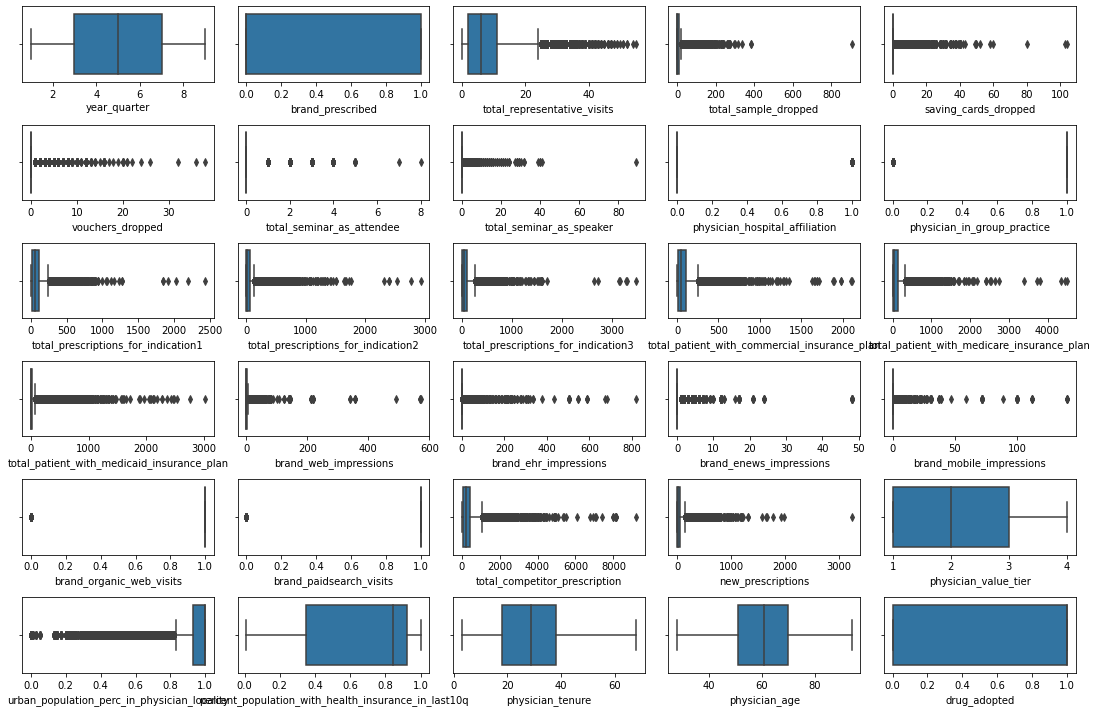

In [23]:
# Outliers check
plt.figure(figsize=(15, 10))
i=0
for col in train_df.select_dtypes(include=np.number).columns[1:]:
    i += 1
    plt.subplot(6, 5, i)
    sns.boxplot(train_df[col])
plt.tight_layout()
plt.show()

Dropping any outliers from our training data will create an imbalance in physicians information across quarters. Therefore, we will replace the outliers with the bounding value of the respective data range.<br>
Based on the above boxplots, potential outliers are:
* total_sample_dropped>300
* saving_cards_dropped>40
* vouchers_dropped>15
* total_seminar_as_speaker>30
* total_prescriptions_for_indication1>1400
* total_prescriptions_for_indication2>1500
* total_prescriptions_for_indication3>1800
* total_patient_with_commercial_insurance_plan>1400
* total_patient_with_medicare_insurance_plan>2000
* total_patient_with_medicaid_insurance_plan>1500
* brand_web_impressions>70
* brand_ehr_impressions>350
* brand_enews_impressions>10
* brand_mobile_impressions>30
* total_competitor_prescription>5500
* new_prescriptions>1300
* urban_population_perc_in_physician_locality<0.2

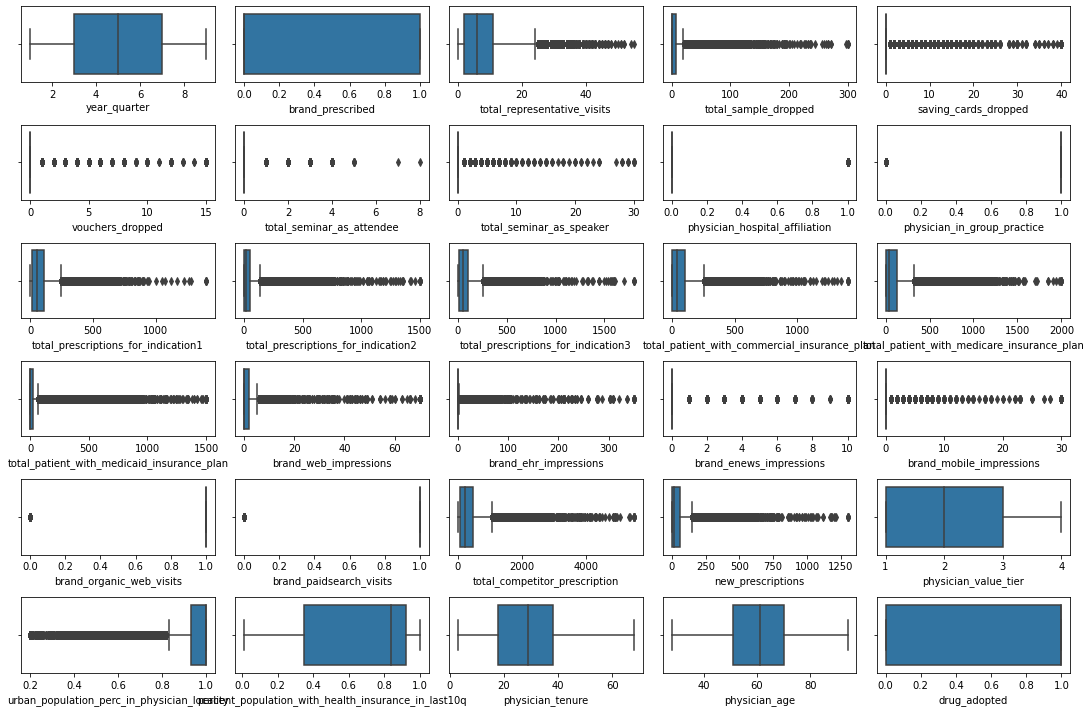

In [24]:
# Dealing with the outliers
train_df_out = train_df.copy()
test_df_out = test_df.copy()

outliers1 = [('total_sample_dropped',300), ('saving_cards_dropped',40), ('vouchers_dropped',15),
             ('total_seminar_as_speaker',30), ('total_prescriptions_for_indication1',1400),
             ('total_prescriptions_for_indication2',1500), ('total_prescriptions_for_indication3',1800),
             ('total_patient_with_commercial_insurance_plan',1400), ('total_patient_with_medicare_insurance_plan',2000),
             ('total_patient_with_medicaid_insurance_plan',1500), ('brand_web_impressions',70), 
             ('brand_ehr_impressions',350), ('brand_enews_impressions',10), ('brand_mobile_impressions',30),
             ('total_competitor_prescription',5500), ('new_prescriptions',1300)]
outliers2 = [('urban_population_perc_in_physician_locality', 0.2)]

for col,val in outliers1:
    for df in [train_df_out, test_df_out]:
        df[col] = df[col].apply(lambda x: val if x>=val else x)
for col,val in outliers2:
    for df in [train_df_out, test_df_out]:
        df[col] = df[col].apply(lambda x: val if x<=val else x)

# Outliers verification
plt.figure(figsize=(15, 10))
i=0
for col in train_df_out.select_dtypes(include=np.number).columns[1:]:
    i += 1
    plt.subplot(6, 5, i)
    sns.boxplot(train_df_out[col])
plt.tight_layout()
plt.show()

We can notice from the above plots that there are no potential outliers. 
# Feature Engineering
Let us check the skewness of the features.

In [25]:
# Skewness check
skewness = train_df_out.skew()
skewed = skewness[skewness>0.7]
skewed

total_representative_visits                      1.100442
total_sample_dropped                             5.356042
saving_cards_dropped                             6.201677
vouchers_dropped                                11.063077
total_seminar_as_attendee                        3.516227
total_seminar_as_speaker                        29.490583
physician_hospital_affiliation                   1.621640
total_prescriptions_for_indication1              2.683220
total_prescriptions_for_indication2              5.086829
total_prescriptions_for_indication3              3.568619
total_patient_with_commercial_insurance_plan     2.823956
total_patient_with_medicare_insurance_plan       3.363270
total_patient_with_medicaid_insurance_plan       5.292527
brand_web_impressions                           10.683513
brand_ehr_impressions                           19.626647
brand_enews_impressions                          6.482365
brand_mobile_impressions                        14.685730
total_competit

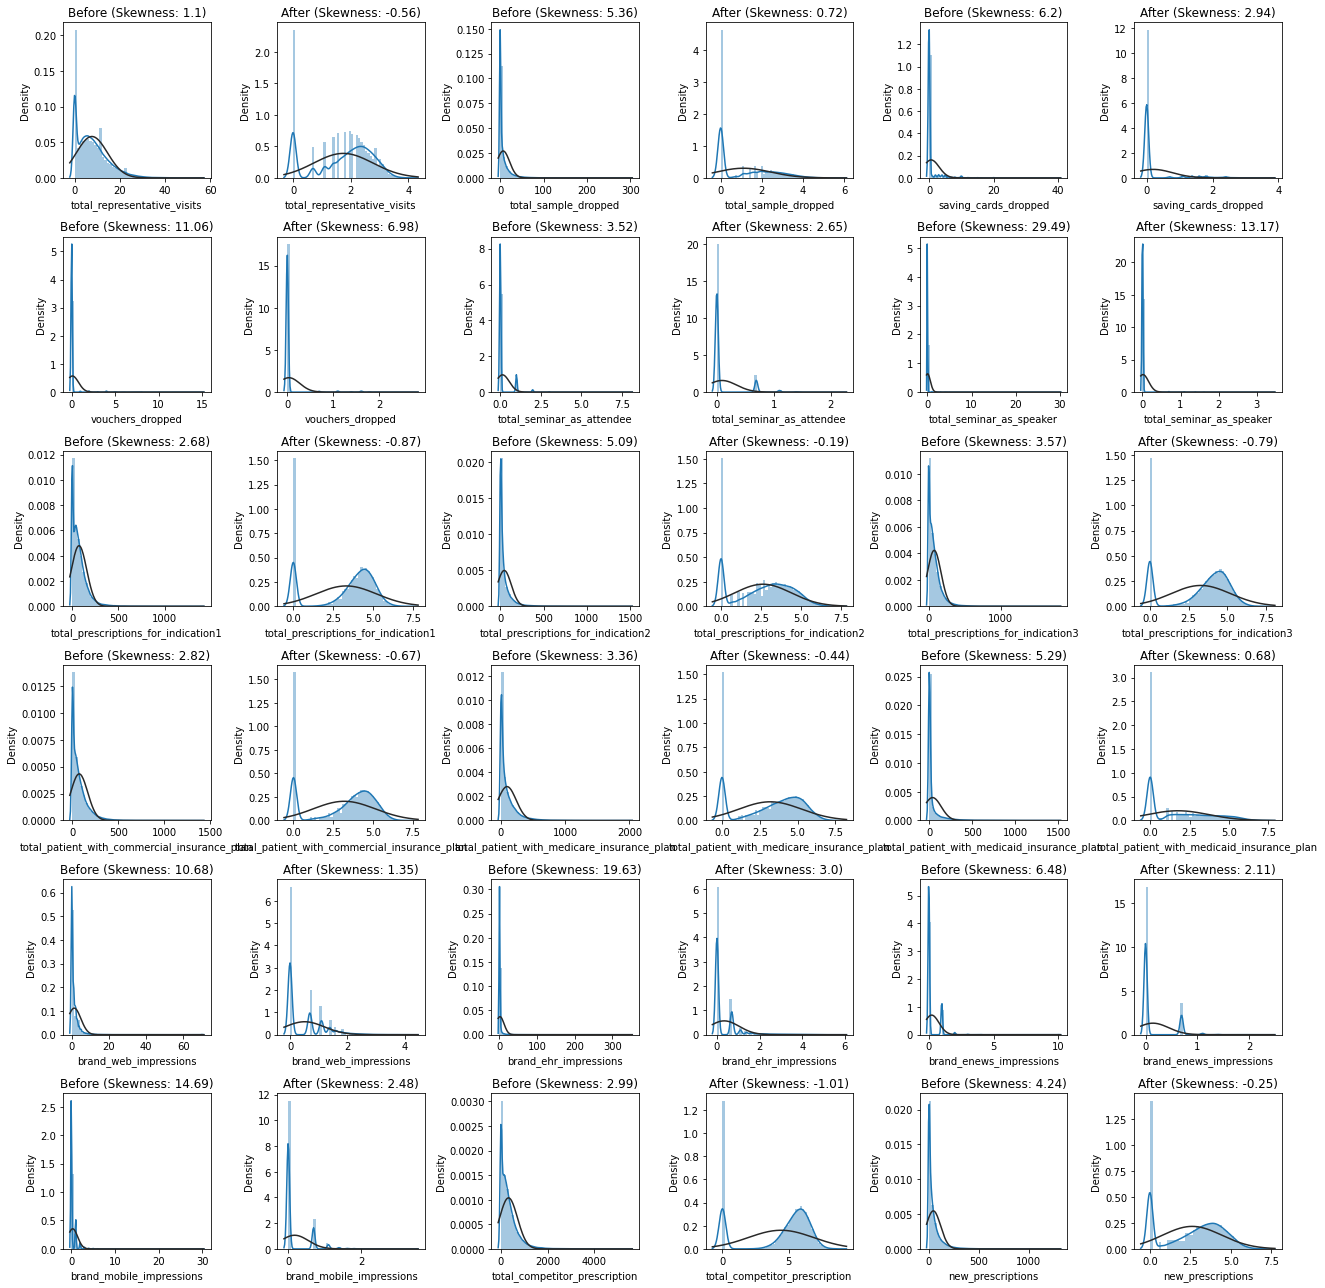

In [26]:
# Transforming data to deal with the skewness
train_df_tfm = train_df_out.copy()
test_df_tfm = test_df_out.copy()

# Dropping a binary feature: 'physician_hospital_affiliation'
skewed_cols = list(skewed.index)
skewed_cols.remove('physician_hospital_affiliation')

# Applying log-transformation
for col in skewed_cols:
    for df in [train_df_tfm, test_df_tfm]:
        df[col] = np.log1p(df[col])

# New skewness check
skewness2 = train_df_tfm.skew()

# Skewness comparison plot
plt.figure(figsize=(18, 18))
i = 0
for col in skewed_cols:
    # Before transformation plot
    i += 1
    plt.subplot(6, 6, i)
    sns.distplot(train_df_out[col], fit=norm)
    plt.title(f'Before (Skewness: {round(skewness[col], 2)})')
    
    # After transformation plot
    i += 1
    plt.subplot(6, 6, i)
    sns.distplot(train_df_tfm[col], fit=norm)
    plt.title(f'After (Skewness: {round(skewness2[col], 2)})')
    
plt.tight_layout()
plt.show()

The skewness has considerably reduced in all the features after applying log-transformation.
# Data Preprocessing
We'll drop the 'physician_id' column as it will not add any value to our prediction.<br>
We'll perform label encoding and one-hot encoding to convert categorical features to numerical features.

In [27]:
# Feature Selection
train_df_fs = train_df_tfm.drop(columns='physician_id')
test_df_fs = test_df_tfm.drop(columns='physician_id')

# Label Encoding
train_df_encoded1 = train_df_fs.replace({'physician_gender': {'M':0, 'F':1}})
test_df_encoded1 = test_df_fs.replace({'physician_gender': {'M':0, 'F':1}})

# One-Hot Encoding
train_df_encoded2 = pd.get_dummies(train_df_encoded1, columns=['physician_speciality'], drop_first=True)
test_df_encoded2 = pd.get_dummies(test_df_encoded1, columns=['physician_speciality'], drop_first=True)

print(train_df_encoded2.shape)
train_df_encoded2.head()

(90000, 33)


,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,new_prescriptions,physician_value_tier,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,drug_adopted,physician_speciality_other,physician_speciality_urology
0,1,0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0,1,...,0.000000,2,0.91,0.89,0,58,83,0,0,0
1,2,0,2.397895,2.484907,0.0,0.0,0.693147,0.0,0,1,...,0.000000,2,0.91,0.89,0,58,83,1,0,0
2,3,1,2.197225,2.197225,0.0,0.0,0.000000,0.0,0,1,...,2.995732,2,0.91,0.89,0,58,83,1,0,0
3,4,1,2.484907,3.218876,0.0,0.0,0.000000,0.0,0,1,...,2.944439,2,0.91,0.89,0,58,83,1,0,0
4,5,1,2.772589,3.806662,0.0,0.0,0.000000,0.0,0,1,...,3.637586,2,0.91,0.89,0,58,83,1,0,0


In [28]:
# Splitting the training data further into training and validation data based on quarters

# Cross Validation Set 1
df_train1 = train_df_encoded2[train_df_encoded2.year_quarter<7]
df_val1 = train_df_encoded2[(train_df_encoded2.year_quarter==7)&(train_df_encoded2.brand_prescribed==0)]
X_train1 = df_train1.drop('drug_adopted', axis=1)
y_train1 = df_train1['drug_adopted']
X_val1 = df_val1.drop('drug_adopted', axis=1)
y_val1 = df_val1['drug_adopted']

# Cross Validation Set 2
df_train2 = train_df_encoded2[train_df_encoded2.year_quarter<8]
df_val2 = train_df_encoded2[(train_df_encoded2.year_quarter==8)&(train_df_encoded2.brand_prescribed==0)]
X_train2 = df_train2.drop('drug_adopted', axis=1)
y_train2 = df_train2['drug_adopted']
X_val2 = df_val2.drop('drug_adopted', axis=1)
y_val2 = df_val2['drug_adopted']

# Cross Validation Set 3
df_train3 = train_df_encoded2[train_df_encoded2.year_quarter<9]
df_val3 = train_df_encoded2[(train_df_encoded2.year_quarter==9)&(train_df_encoded2.brand_prescribed==0)]
X_train3 = df_train3.drop('drug_adopted', axis=1)
y_train3 = df_train3['drug_adopted']
X_val3 = df_val3.drop('drug_adopted', axis=1)
y_val3 = df_val3['drug_adopted']

# Final Train-Test Set
X_train = train_df_encoded2.drop('drug_adopted', axis=1)
y_train = train_df_encoded2['drug_adopted']
X_test = test_df_encoded2

print(f'Cross Validation Set 1 Shape: {X_train1.shape}, {X_val1.shape}, {y_train1.shape}, {y_val1.shape}')
print(f'Cross Validation Set 2 Shape: {X_train2.shape}, {X_val2.shape}, {y_train2.shape}, {y_val2.shape}')
print(f'Cross Validation Set 3 Shape: {X_train3.shape}, {X_val3.shape}, {y_train3.shape}, {y_val3.shape}')
print(f'Final Train-Test Set Shape: {X_train.shape}, {X_test.shape}, {y_train.shape}')

# Standardization
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Creating a cross-validation variable
cv = [(X_train1.index, X_val1.index), (X_train2.index, X_val2.index), (X_train3.index, X_val3.index)]

# Defining a function to calculate scores
def calculate_scores(model):
    f1_score = cross_val_score(model, X_train_sc, y_train, cv=cv, scoring='f1')
    roc_auc = cross_val_score(model, X_train_sc, y_train, cv=cv, scoring='roc_auc')
    accuracy = cross_val_score(model, X_train_sc, y_train, cv=cv, scoring='accuracy')
    return(round(f1_score.mean(), 3), round(roc_auc.mean(), 3), round(accuracy.mean(), 3))

Cross Validation Set 1 Shape: (60000, 32), (3797, 32), (60000,), (3797,)
Cross Validation Set 2 Shape: (70000, 32), (3523, 32), (70000,), (3523,)
Cross Validation Set 3 Shape: (80000, 32), (3135, 32), (80000,), (3135,)
Final Train-Test Set Shape: (90000, 32), (1502, 32), (90000,)


As data is a function of time, we used time-based splitting. We prepared three cross validation sets based on quarters as follow:<br>
Set1: train=[1,2,3,4,5,6] validation=[7]<br>
Set2: train=[1,2,3,4,5,6,7] validation=[8]<br>
Set3: train=[1,2,3,4,5,6,7,8] validation=[9]<br>
The final train-test set with respect to quarters is as follow:<br>
Final set: train=[1,2,3,4,5,6,7,8,9] test=[10]<br><br>
For training, we considered the entire data available for the respective quarters for each physician. But, for validation, we considered only those physicians who had not adopted the drug in that quarter to resemble our validation set with the final test set for better model performance evaluation.

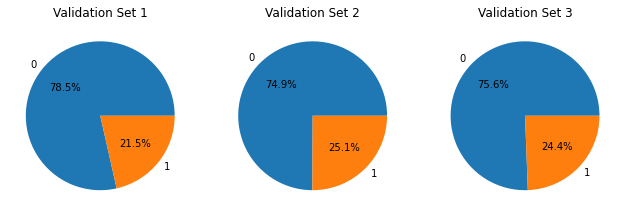

In [29]:
# Class imbalance check for our validation sets
plt.figure(figsize=(9, 3))
i=0
for y_val in [y_val1, y_val2, y_val3]:
    i+=1
    plt.subplot(1, 3, i)
    data = y_val.value_counts()
    plt.pie(data, labels=data.index, autopct='%0.1f%%')
    plt.title(f'Validation Set {i}')
plt.tight_layout()
plt.show()

We investigated in the beginning for a class imbalance in our entire training dataset, and the classes were turned out to be balanced. But, if we look at the class distribution for the validation sets on which we were going to evaluate performance of our machine learning models, they are pretty much imbalanced. Therefore, we will use 'F1-Score' as our evaluation metric while training ML models as it works well in case of a class imbalance problem.

# ML Modeling

In [30]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn_f1, knn_auc, knn_acc = calculate_scores(knn)
print(f'F1-Score:{knn_f1}, ROC-AUC:{knn_auc}, Accuracy:{knn_acc}')

F1-Score:0.232, ROC-AUC:0.607, Accuracy:0.744


The score did not significantly improve with other values of 'n_neighbors'. Hence, we will compare the above model with other ML models.

In [31]:
# Logistic Regression Model
lr = LogisticRegression()
lr_f1, lr_auc, lr_acc = calculate_scores(lr)
print(f'F1-Score:{lr_f1}, ROC-AUC:{lr_auc}, Accuracy:{lr_acc}')

F1-Score:0.305, ROC-AUC:0.687, Accuracy:0.776


In [32]:
# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb_f1, gnb_auc, gnb_acc = calculate_scores(gnb)
print(f'F1-Score:{gnb_f1}, ROC-AUC:{gnb_auc}, Accuracy:{gnb_acc}')

F1-Score:0.371, ROC-AUC:0.564, Accuracy:0.391


In [33]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=8)
dt_f1, dt_auc, dt_acc = calculate_scores(dt)
print(f'F1-Score:{dt_f1}, ROC-AUC:{dt_auc}, Accuracy:{dt_acc}')

F1-Score:0.491, ROC-AUC:0.668, Accuracy:0.756


In [34]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=8)
rf_f1, rf_auc, rf_acc = calculate_scores(rf)
print(f'F1-Score:{rf_f1}, ROC-AUC:{rf_auc}, Accuracy:{rf_acc}')

F1-Score:0.477, ROC-AUC:0.786, Accuracy:0.832


In [35]:
# Extreme Gradient Boosting Classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=8)
xgb_f1, xgb_auc, xgb_acc = calculate_scores(xgb)
print(f'F1-Score:{xgb_f1}, ROC-AUC:{xgb_auc}, Accuracy:{xgb_acc}')

F1-Score:0.589, ROC-AUC:0.782, Accuracy:0.856


As 'Decision Tree Classifier', 'Random Forest Classifier', and 'Extreme Gradient Boosting Classifier' perform pretty well compared to the other models, let us carry out hyperparameter tuning of these three models.

## Hyperparameter Tuning

The grid search approach was used iteratively to find the best combination of hyperparameters for each classifier. We started with the broader range of values for each hyperparameter and decreased the range as we approached the optimum values. (Since the grid search method has high run-time, its code and output are written as markdown.)

**Decision Tree Classifier's Hyperparameter Tuning using GridSearchCV**
```
params = [{'criterion':['gini', 'entropy'],
           'max_depth': [15, 18, 20],
           'min_samples_split': [35, 40, 45]}]

gs_dt = GridSearchCV(dt, param_grid=params, scoring='f1', cv=cv)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)
```
>{'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 40}

In [36]:
# Decision Tree Classifier with Hyperparameter Tuning
dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_split=40, random_state=8)
dt_tuned_f1, dt_tuned_auc, dt_tuned_acc = calculate_scores(dt_tuned)
print(f'F1-Score:{dt_tuned_f1}, ROC-AUC:{dt_tuned_auc}, Accuracy:{dt_tuned_acc}')

F1-Score:0.542, ROC-AUC:0.73, Accuracy:0.826


**Random Forest Classifier's Hyperparameter Tuning using GridSearchCV**
```
params = [{'max_features':['log2', 'sqrt'],
           'max_depth': [35, 40, 45],
           'max_samples': [0.82, 0.83, 0.84],
           'min_samples_split': [6, 7, 8]}]

gs_rf = GridSearchCV(rf, param_grid=params, scoring='f1', cv=cv)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_params_)
```
>{'max_features':'sqrt', 'max_depth': 40, 'max_samples': 0.83, 'min_samples_split': 7}

In [37]:
# Random Forest Classifier with Hyperparameter Tuning
rf_tuned = RandomForestClassifier(max_features='sqrt', max_depth=40, max_samples=0.83, min_samples_split=7, random_state=8)
rf_tuned_f1, rf_tuned_auc, rf_tuned_acc = calculate_scores(rf_tuned)
print(f'F1-Score:{rf_tuned_f1}, ROC-AUC:{rf_tuned_auc}, Accuracy:{rf_tuned_acc}')

F1-Score:0.49, ROC-AUC:0.783, Accuracy:0.835


**Extreme Gradient Boosting Classifier's Hyperparameter Tuning using GridSearchCV**
```
params = [{'learning_rate': [0.1, 0.2, 0.3],
           'scale_pos_weight': [1, 2, 3],
           'gamma': [0.05, 0.1, 0.15]}]

gs_xgb = GridSearchCV(xgb, param_grid=params, scoring='f1', cv=cv)
gs_xgb.fit(X_train, y_train)
print(gs_xgb.best_params_)
```
>{'learning_rate':0.2, 'scale_pos_weight': 2, 'gamma': 0.1}

In [38]:
# Extreme Gradient Boosting Classifier with Hyperparameter Tuning
xgb_tuned = XGBClassifier(objective='binary:logistic', eval_metric='auc', learning_rate=0.2, scale_pos_weight=2, gamma=0.1, random_state=8)
xgb_tuned_f1, xgb_tuned_auc, xgb_tuned_acc = calculate_scores(xgb_tuned)
print(f'F1-Score:{xgb_tuned_f1}, ROC-AUC:{xgb_tuned_auc}, Accuracy:{xgb_tuned_acc}')

F1-Score:0.61, ROC-AUC:0.793, Accuracy:0.846


## Ensemble Learning
Let us try ensemble learning methods on these three classifiers.
(Code and output are written in markdown, considering the high run time of ensemble learning classifiers.)

**Voting Classifier**
```
vc = VotingClassifier(estimators=[('rf', rf_tuned), ('dt', dt_tuned), ('xgb', xgb_tuned)],
                      voting='soft', weights=[1,1,3])
calculate_scores(vc)
```
>F1-Score:0.603, ROC-AUC:0.794, Accuracy:0.855

**Stacking Classifier**
```
sc = StackingClassifier(estimators=[('dt', dt_tuned), ('rf', rf_tuned)], final_estimator=xgb_tuned)
calculate_scores(sc)
```
>F1-Score:0.581, ROC-AUC:0.78, Accuracy:0.836

The ensemble learning has not resulted in a better performance. Therefore, we will compare the remaining ML models.

## Model Comparison

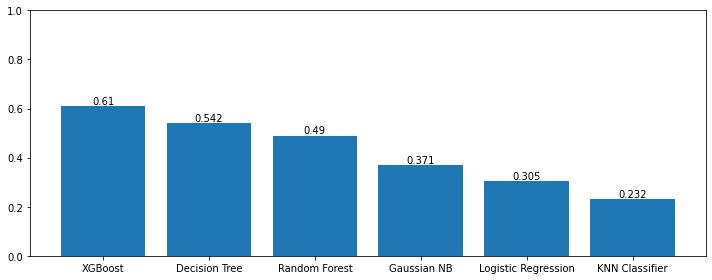

In [39]:
# Comparing all applied ML models
model_names = ['KNN Classifier', 'Logistic Regression', 'Gaussian NB', 'Decision Tree',
               'Random Forest', 'XGBoost']
scores = [knn_f1, lr_f1, gnb_f1, dt_tuned_f1, rf_tuned_f1, xgb_tuned_f1]
model_scores = pd.Series(scores, index=model_names)
model_scores.sort_values(ascending=False, inplace=True)

# Plotting model scores
plt.figure(figsize=(10, 4))
vbar = plt.bar(model_scores.index, model_scores)
plt.bar_label(vbar)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

The 'Extreme Gradient Boosting Classifier' comes out to be the best performer among all the applied ML models. Therefore, we will predict the dependent variable for the testing data using the XGBoost classifier.
## Feature Importance
Let us understand the most important and least important features in predicting the dependent variable.

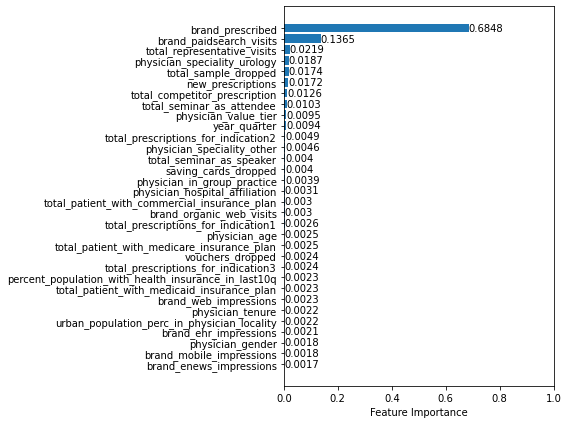

In [40]:
# Feature importance study
xgb_tuned.fit(X_train, y_train)
feat_imp = pd.Series(xgb_tuned.feature_importances_.round(4), index=X_train.columns)
feat_imp.sort_values(inplace=True)

# Plotting feature importances
plt.figure(figsize=(8, 6))
hbar = plt.barh(feat_imp.index, feat_imp)
plt.bar_label(hbar)
plt.xlabel('Feature Importance')
plt.xlim([0, 1])
plt.tight_layout()
plt.show()

The **key drivers** of the final ML model are 'brand_prescribed', 'brand_paidsearch_visits', 'total_representative_visits', 'physician_speciality_urology', 'total_sample_dropped', and 'new_prescriptions'.

# Final Prediction

In [41]:
submission_df = test_df.copy()
submission_df['Predicted drug adoption class'] = xgb_tuned.predict(X_test_sc)
submission_df['Predicted drug adoption probability'] = xgb_tuned.predict_proba(X_test_sc)[:, 1]
#submission_df.to_csv('Predictions_test_physicians.csv', index=False)
print(submission_df.shape)
submission_df.head()

(1502, 34)


,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,new_prescriptions,physician_value_tier,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,Predicted drug adoption class,Predicted drug adoption probability
0,7,10,0,4,8,0,0,0,0,0,...,0,4,0.62,0.90,M,47,72,nephrology,0,0.175753
1,9,10,0,8,0,0,0,0,0,0,...,0,3,0.90,0.29,M,46,73,other,0,0.304320
2,12,10,0,2,9,0,0,0,0,0,...,5,3,1.00,0.08,M,37,65,other,0,0.176381
3,19,10,0,5,0,0,0,0,0,0,...,21,2,1.00,0.96,M,46,70,nephrology,0,0.077128
4,20,10,0,0,0,0,0,0,0,0,...,36,4,1.00,0.86,M,46,72,nephrology,0,0.107638


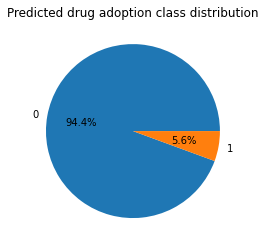

In [42]:
# Plotting predicted drug adoption class distribution
data = submission_df['Predicted drug adoption class'].value_counts()
plt.pie(data, labels=data.index, autopct='%0.1f%%')
plt.title('Predicted drug adoption class distribution')
plt.show()

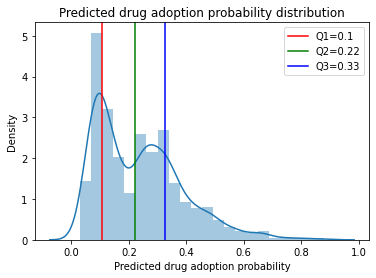

In [43]:
# Plotting predicted drug adoption probability distribution
data = submission_df['Predicted drug adoption probability']
sns.distplot(data)
quartiles = np.quantile(data, [0.25, 0.50, 0.75])
colors = ['r', 'g', 'b']
labels = ['Q1', 'Q2', 'Q3']
for q, c, l in zip(quartiles, colors, labels):
    plt.axvline(x=q, c=c, label=l+f'={round(q, 2)}')
plt.legend()
plt.title('Predicted drug adoption probability distribution')
plt.show()

**Thank You!**